# 50.038 Computational Data Science project

Group members:<br />Kenny Ong Ker Chin 1005290 <br />Jobelle Lee Ern Ee 1005547<br />Joe Baarath 100

## Problem

The problem is to predict the prices of public housing units in Singapore based on their characteristics. This will help potential buyers and sellers to make informed decisions about the market value of their properties.

## Dataset

The Housing and Development Board provides data on the resale price of the flats as well as relevant data that might impact these prices.<br />
Coverage of the data is from January 1, 2017 to March 5, 2023.<br />
The dataset includes information on the location, type, size, and age of the units. <a href='https://data.gov.sg/dataset/resale-flat-prices'>https://data.gov.sg/dataset/resale-flat-prices</a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

url = "https://data.gov.sg/api/action/datastore_search?resource_id=f1765b54-a209-4718-8d38-a39237f502b3" # Resale Flat Prices data

<h1>Data Visualization</h1>

In [88]:
# Search data through API

def searchData(url, keyword):
    results = pd.DataFrame()
    data = requests.get(f"{url}&q={keyword}").json()
    results.append(data['result']['records'])
    
    while data['result']['_links']['next']:
        data = requests.get("https://data.gov.sg/" + data['result']['_links']['next']).json()
        results.append(data['result']['records'])

    return results

def limitData(url, limitNum):
    data = requests.get(f"{url}&limit={limitNum}").json()
    return data['result']['records']


In [127]:
df = pd.read_csv("data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
df['year'] = df['month'].apply(lambda x: x.split('-')[0])
df['month'] = df['month'].apply(lambda x: x.split('-')[1])

#convert remaining lease from years to months
df['month_remaining_lease'] = df['remaining_lease'].apply(lambda x: int(x.split(' ')[0]) * 12 + int(x.split(' ')[2]) if len(x.split(' ')) > 2 else int(x.split(' ')[0]) * 12)

# Split storey_range into 2 columns
df['storey_range_low'] = df['storey_range'].apply(lambda x: int(x.split(' TO ')[0]))
df['storey_range_high'] = df['storey_range'].apply(lambda x:int(x.split(' TO ')[1]))

df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,month_remaining_lease,storey_range_low,storey_range_high
0,01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,736,10,12
1,01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,727,1,3


In [101]:
df.town.value_counts()

SENGKANG           12478
PUNGGOL            10900
WOODLANDS          10306
YISHUN             10149
TAMPINES            9958
JURONG WEST         9818
BEDOK               7981
HOUGANG             7267
CHOA CHU KANG       6804
ANG MO KIO          6182
BUKIT MERAH         5680
BUKIT PANJANG       5672
BUKIT BATOK         4972
TOA PAYOH           4742
PASIR RIS           4567
KALLANG/WHAMPOA     4453
QUEENSTOWN          4211
GEYLANG             3675
SEMBAWANG           3671
CLEMENTI            3390
JURONG EAST         3086
BISHAN              2805
SERANGOON           2761
CENTRAL AREA        1236
MARINE PARADE        948
BUKIT TIMAH          386
Name: town, dtype: int64

                     floor_area_sqm  lease_commence_date  resale_price
floor_area_sqm             1.000000             0.135384      0.612471
lease_commence_date        0.135384             1.000000      0.359414
resale_price               0.612471             0.359414      1.000000


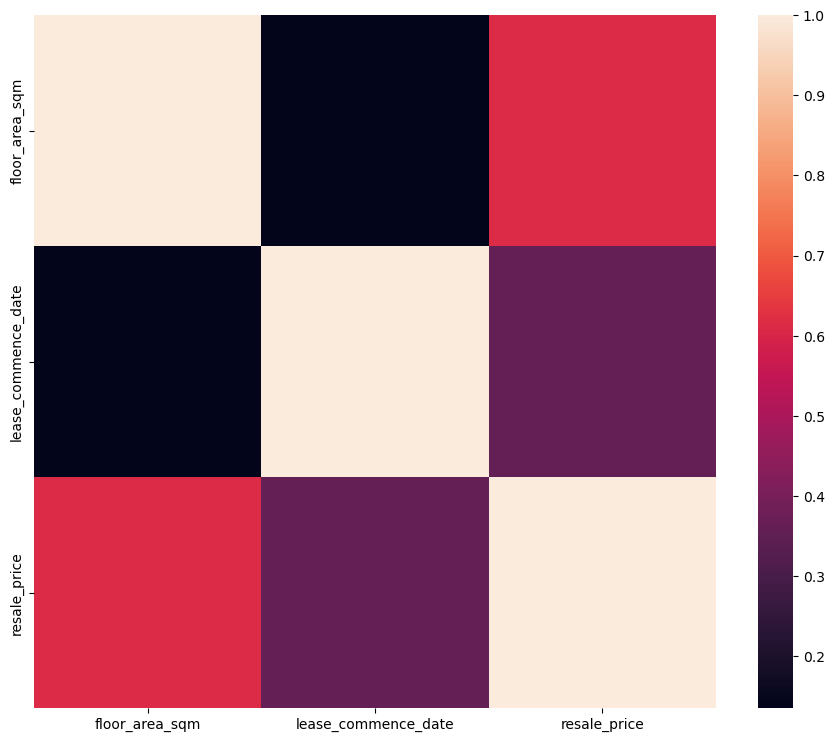

In [94]:
# Compute the correlation matrix
corr = df.corr()
print(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(df.corr());

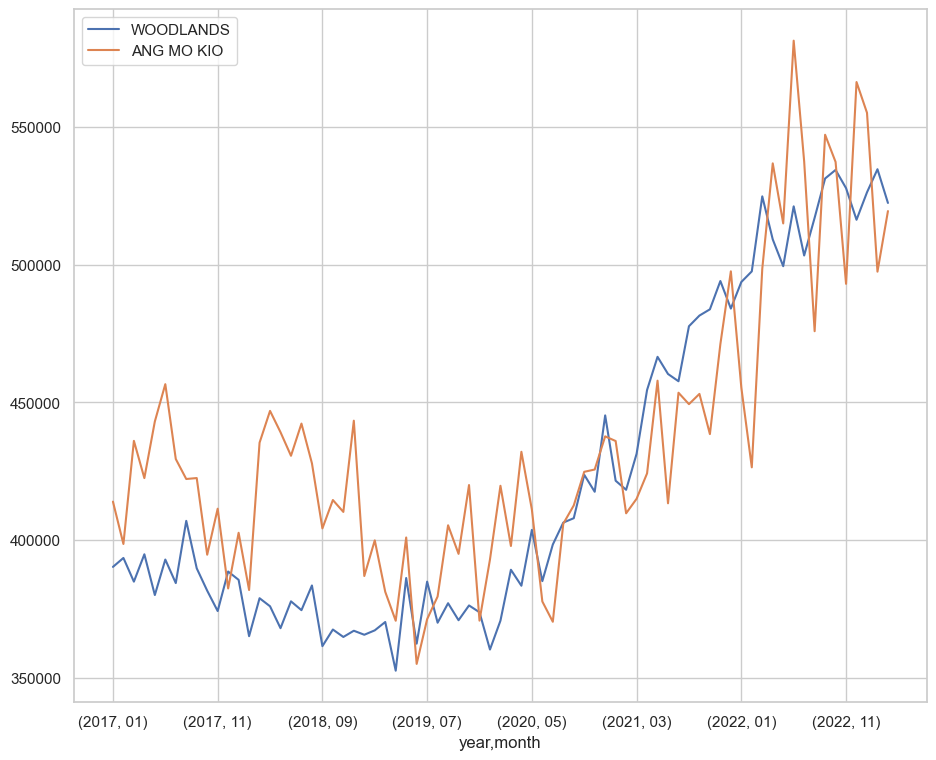

In [153]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(11, 9))

# for each month and year, plot the mean price into line chart with legend
def query_mean_plot_by_town(town):
    df[df['town'] == town].groupby(['year', 'month']).mean()['resale_price'].plot(label=town)
    plt.legend()
    
query_mean_plot_by_town('WOODLANDS')
query_mean_plot_by_town('ANG MO KIO')

<AxesSubplot:title={'center':'Town'}>

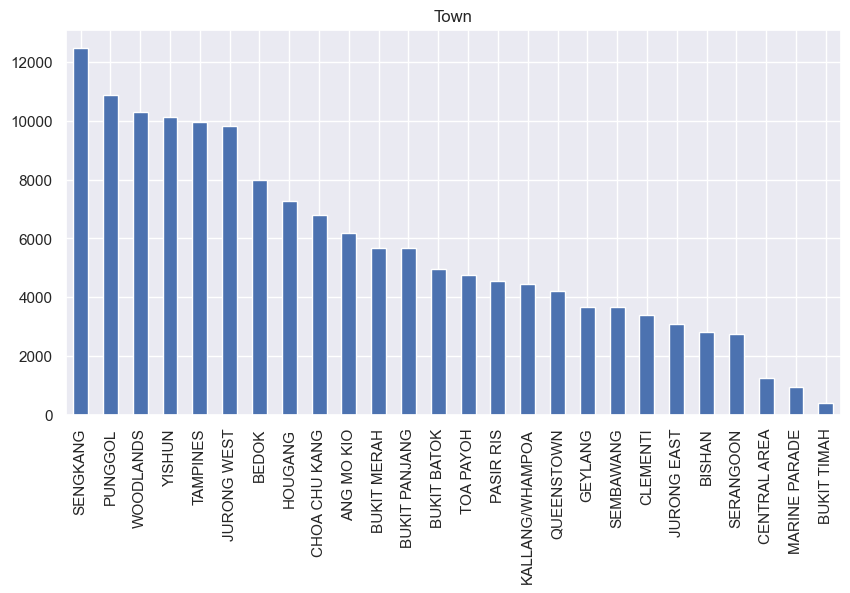

In [132]:
df.town.value_counts().plot(kind='bar', figsize=(10, 5), title='Town')

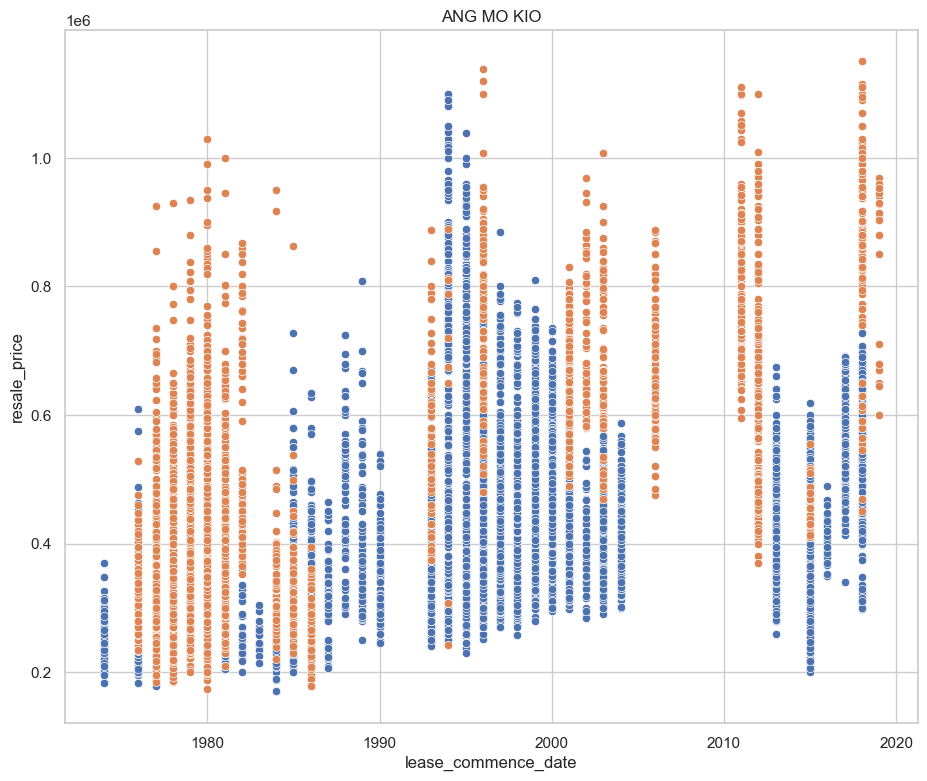

In [164]:
# For each town, plot lease_commence_date against resale price
f, ax = plt.subplots(figsize=(11, 9))
def plot_date_agst_price(town):
    sns.scatterplot(x='lease_commence_date', y='resale_price', data=df[df['town'] == town])
    plt.title(town)
    

plot_date_agst_price('WOODLANDS')
plot_date_agst_price('ANG MO KIO')

<h1>Algorithm</h1>

In [ ]:
# TODO: Drop the following feature
# .. your code here ..